In [12]:
!pip install plotly
#Command for ModuleNotFoundError: No module named 'plotly'

READING IN DATA FROM CSV FILE

In [33]:
import numpy as np
import pandas as pd
data = pd.read_csv('C:\\Users\\HP\\Documents\\RetailShop\\Cleaned_SalesDataSet.csv')
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [32]:
data.head()

,ds,shop_id,product_id,product_name,y,revenue_(zar),sales_period_(daily/weekly),is_weekend
0,1/2/2024,SP001,P002,Milk,50,500.0,Daily,False
1,1/3/2024,SP002,P003,Soap,30,300.0,Daily,False
2,1/4/2024,SP001,P004,Sugar,40,400.0,Daily,False
3,1/6/2024,SP002,P002,Milk,60,600.0,Daily,True
4,1/7/2024,SP002,P003,Soap,35,350.0,Daily,True


In [21]:
data.columns

Index(['date', 'shop_id', 'product_id', 'product_name', 'units_sold',
       'revenue_(zar)', 'sales_period_(daily/weekly)', 'is_weekend'],
      dtype='object')

In [34]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         75 non-null     object 
 1   shop_id                      75 non-null     object 
 2   product_id                   75 non-null     object 
 3   product_name                 75 non-null     object 
 4   units_sold                   75 non-null     int64  
 5   revenue_(zar)                75 non-null     float64
 6   sales_period_(daily/weekly)  75 non-null     object 
 7   is_weekend                   75 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 4.8+ KB


In [35]:
# data secsribe
data.describe()

,units_sold,revenue_(zar)
count,75.000000,75.000000
mean,26.240000,348.138667
std,16.055512,207.058018
min,0.000000,8.000000
25%,13.500000,181.970000
50%,26.000000,350.000000
75%,37.500000,495.180000
max,80.000000,960.000000


Fitting the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the historical dataframe.
Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. 

In [36]:
import pandas as pd
from prophet import Prophet

# Renaming columns to match Prophet's requirements
data.rename(columns={'date': 'ds', 'units_sold': 'y'}, inplace=True)

# Instantiate Prophet object
m = Prophet()
# Adding custom weekly seasonality
# 'weekly' seasonality is already included by default, but this allows you to add a stronger effect on weekends.
# Convert 'is_weekend' to boolean
data['is_weekend'] = data['is_weekend'].apply(lambda x: True if x == "Weekend" else False)
m.add_seasonality(name='weekend', period=7, fourier_order=3, condition_name='is_weekend')
# Fit the model
m.fit(data)


11:31:38 - cmdstanpy - INFO - Chain [1] start processing
11:31:38 - cmdstanpy - INFO - Chain [1] done processing


You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.

In [25]:
future = m.make_future_dataframe(periods=365)
future.tail()


,ds
435,2025-03-13
436,2025-03-14
437,2025-03-15
438,2025-03-16
439,2025-03-17


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals

In [28]:
# Adding the 'is_weekend' column to the future DataFrame
future['is_weekend'] = future['ds'].apply(lambda x: True if x.weekday() >= 5 else False)

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
435,2025-03-13,447.438982,85.706396,808.059603
436,2025-03-14,449.583940,85.332448,810.908474
437,2025-03-15,451.736695,90.627034,814.150900
438,2025-03-16,450.703660,90.460622,815.539207
439,2025-03-17,453.053150,86.876100,816.144983


C:\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



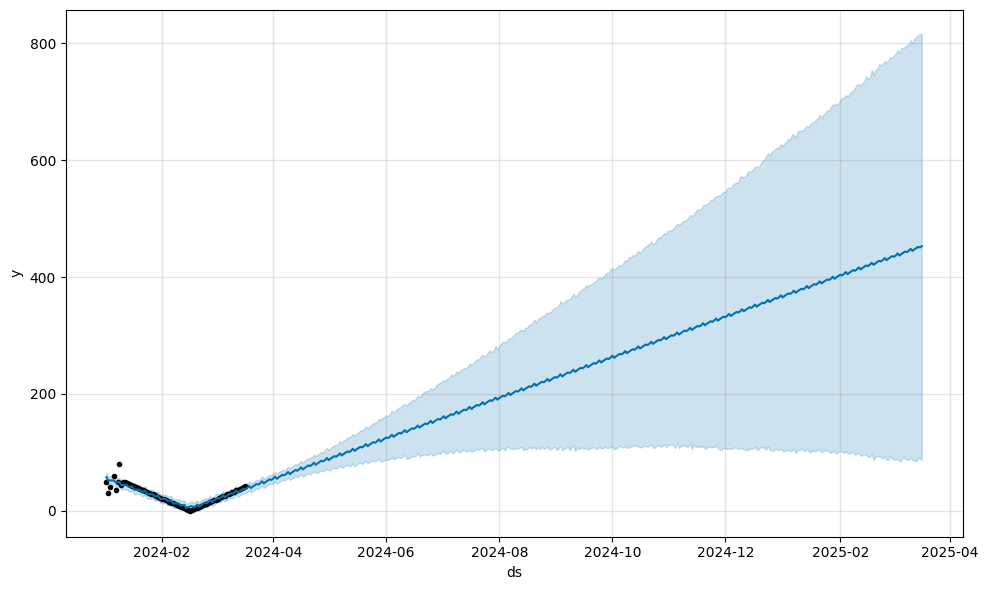

In [29]:
#Plotting the forecast by calling the Prophet.plot method and passing in your forecast dataframe.
fig1 = m.plot(forecast)



If you want to see the forecast components, you can use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

C:\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



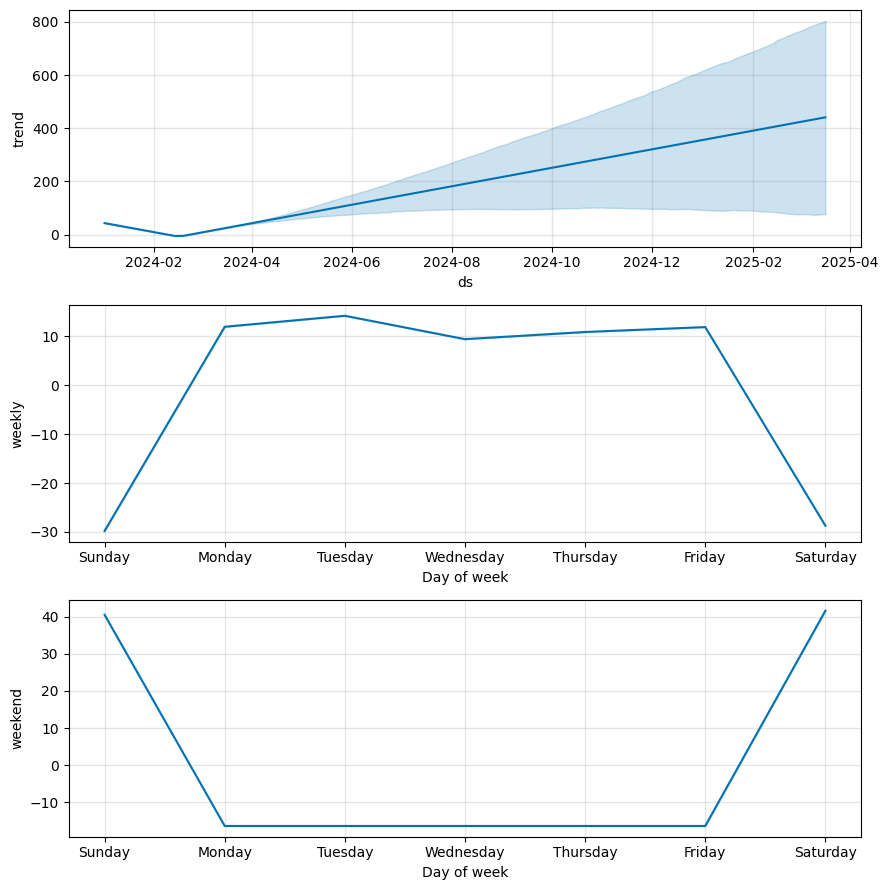

In [30]:
fig2 = m.plot_components(forecast)

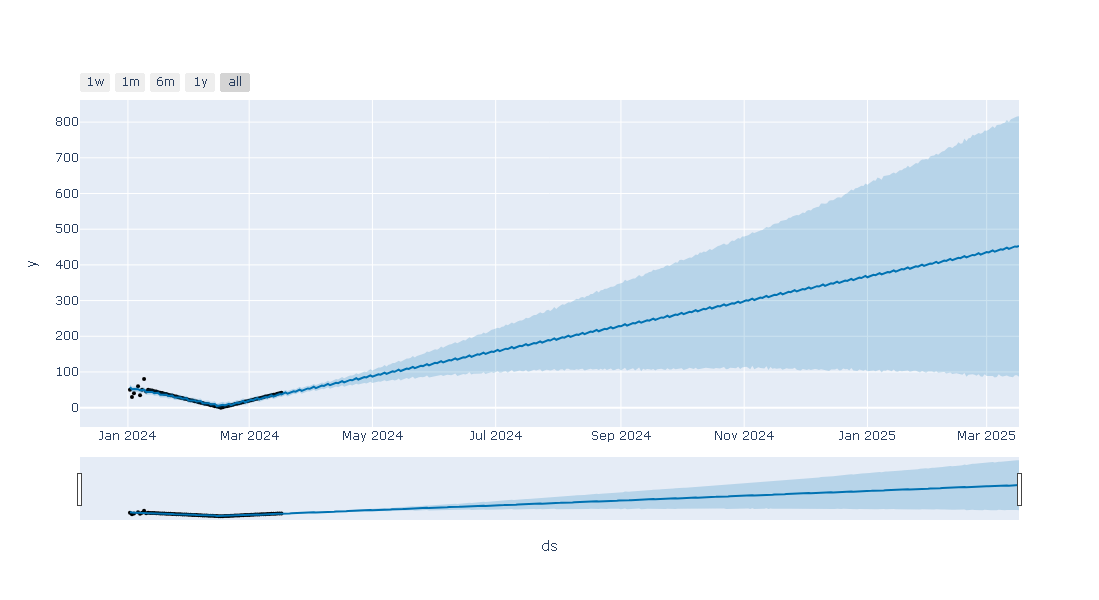

In [31]:
#An interactive figure of the forecast and components created with plotly.
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)